# Predicción de abandono del servicio en Telecom X

## Preparación de los datos

In [2]:
import pandas as pd

In [3]:
path = 'datos/datos_tratados.csv'
df = pd.read_csv(path)
df.sample(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
3996,5639-NTUPK,No,Male,No,No,Yes,13,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1.74,52.10,670.65
568,0836-SEYLU,Yes,Male,No,Yes,No,9,No,No,DSL,...,No,Yes,Yes,No,Month-to-month,No,Mailed check,1.36,40.65,328.95
6574,9350-VLHMB,No,Male,No,Yes,Yes,67,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),2.98,89.55,6373.10
5492,7730-CLDSV,No,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),3.29,98.65,7129.45
6734,9565-AXSMR,No,Male,No,Yes,Yes,52,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,0.64,19.20,1054.75


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   str    
 1   Churn             7043 non-null   str    
 2   Gender            7043 non-null   str    
 3   SeniorCitizen     7043 non-null   str    
 4   Partner           7043 non-null   str    
 5   Dependents        7043 non-null   str    
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   str    
 8   MultipleLines     7043 non-null   str    
 9   InternetService   7043 non-null   str    
 10  OnlineSecurity    7043 non-null   str    
 11  OnlineBackup      7043 non-null   str    
 12  DeviceProtection  7043 non-null   str    
 13  TechSupport       7043 non-null   str    
 14  StreamingTV       7043 non-null   str    
 15  StreamingMovies   7043 non-null   str    
 16  Contract          7043 non-null   str    
 17  Paperl

In [5]:
df = df.drop(columns=['CustomerID'])

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
categorical_features = df.columns.drop(['Churn', 'Tenure', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal'])

one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_features),
    remainder='passthrough', sparse_threshold=0
)

In [9]:
X = one_hot.fit_transform(X)

columns = [col.replace('remainder__', '').replace('onehotencoder__', '') for col in one_hot.get_feature_names_out()]
X = pd.DataFrame(X, columns=columns)
X.sample(5)

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal
2086,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,67.0,2.87,86.15,5883.85
5702,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,40.0,1.41,42.35,1716.45
3014,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,72.0,0.85,25.40,1710.90
4421,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,45.0,2.98,89.30,4192.15
5820,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0.69,20.65,1022.95


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.Series(y, name='Churn')

In [12]:
print(f'Existe una proporción de {y.mean()*100:.2f}% de clientes que abandonaron el servicio.')

Existe una proporción de 26.54% de clientes que abandonaron el servicio.


In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [14]:
pipeline_us = imbpipeline(steps=[
    ('under', NearMiss(version=3)),
    ('model', DecisionTreeClassifier(max_depth=10, random_state=42))
])
pipeline_os = imbpipeline(steps=[
    ('over', SMOTE()),
    ('model', DecisionTreeClassifier(max_depth=10, random_state=42))
])

In [15]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_us = cross_val_score(pipeline_us, X, y, cv=skf, scoring='recall')
cv_results_os = cross_val_score(pipeline_os, X, y, cv=skf, scoring='recall')

In [16]:
print(f'El recall del Under Sampling es {cv_results_us.mean():.4f}')
print(f'El recall del Over Sampling es {cv_results_os.mean():.4f}')

El recall del Under Sampling es 0.6645
El recall del Over Sampling es 0.5832


In [17]:
under_sample = NearMiss(version=3)
X_balanceado, y_balanceado = under_sample.fit_resample(X, y)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

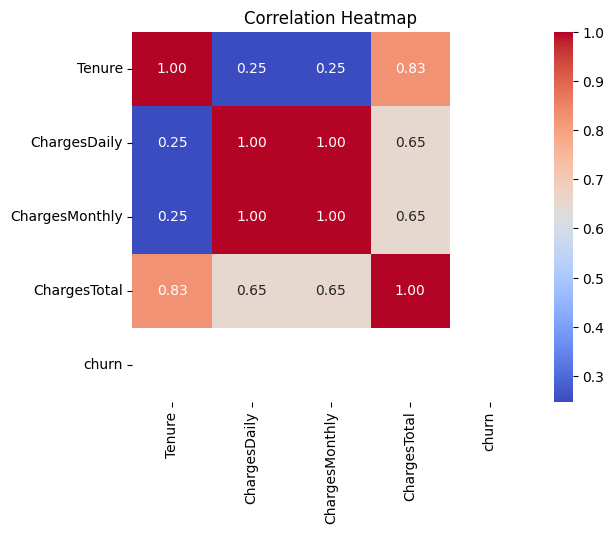

In [19]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure()
sns.heatmap(pd.concat([df[columnas_numericas], pd.DataFrame(y, columns=['churn'])], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

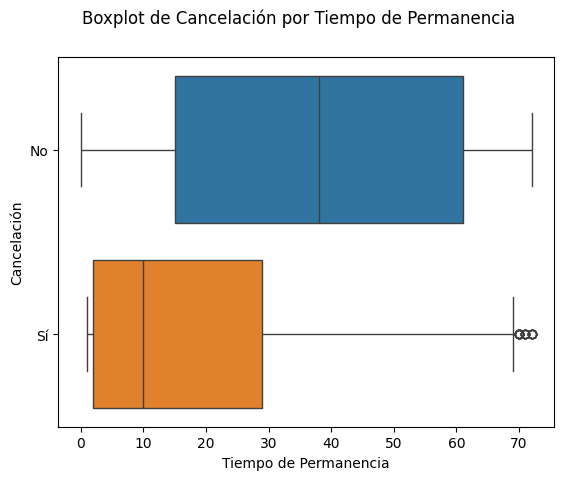

In [20]:
fig = plt.figure()
sns.boxplot(data=df, y='Churn', x='Tenure', hue='Churn')
fig.suptitle('Boxplot de Cancelación por Tiempo de Permanencia')
fig.axes[0].set_xlabel('Tiempo de Permanencia')
fig.axes[0].set_ylabel('Cancelación')
fig.axes[0].set_yticks([0, 1], labels=['No', 'Sí'])
plt.show()

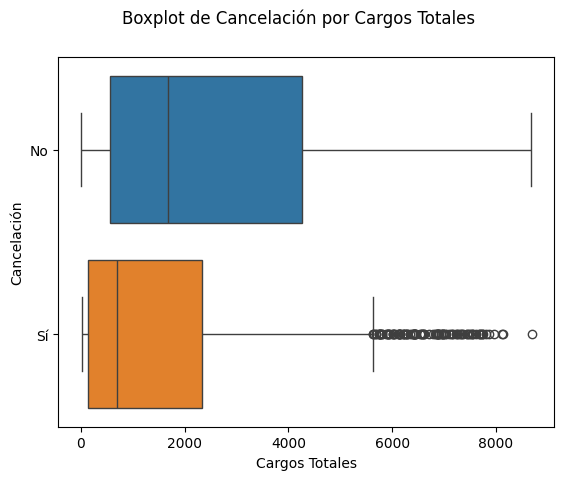

In [21]:
fig = plt.figure()
sns.boxplot(data=df, y='Churn', x='ChargesTotal', hue='Churn')
fig.suptitle('Boxplot de Cancelación por Cargos Totales')
fig.axes[0].set_xlabel('Cargos Totales')
fig.axes[0].set_ylabel('Cancelación')
fig.axes[0].set_yticks([0, 1], labels=['No', 'Sí'])
plt.show()

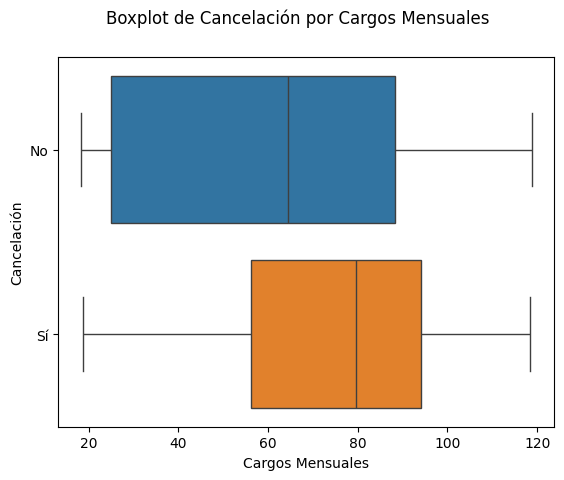

In [22]:
fig = plt.figure()
sns.boxplot(data=df, y='Churn', x='ChargesMonthly', hue='Churn')
fig.suptitle('Boxplot de Cancelación por Cargos Mensuales')
fig.axes[0].set_xlabel('Cargos Mensuales')
fig.axes[0].set_ylabel('Cancelación')
fig.axes[0].set_yticks([0, 1], labels=['No', 'Sí'])
plt.show()

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


In [26]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

pipeline_baseline = make_pipeline(DummyClassifier(strategy="most_frequent"))
cv_baseline = cross_validate(pipeline_baseline, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

pipeline_lr = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42))
cv_lr = cross_validate(pipeline_lr, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

pipeline_dt = make_pipeline(DecisionTreeClassifier(max_depth=10, random_state=42))
cv_dt = cross_validate(pipeline_dt, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

pipeline_rf = make_pipeline(RandomForestClassifier(random_state=42))
cv_rf = cross_validate(pipeline_rf, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

pipeline_svc = make_pipeline(MinMaxScaler(), SVC(random_state=42))
cv_svc = cross_validate(pipeline_svc, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

pipeline_mlp = make_pipeline(MinMaxScaler(), MLPClassifier(max_iter=1000, hidden_layer_sizes=(64,32), early_stopping=True, random_state=42))
cv_mlp = cross_validate(pipeline_mlp, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

pipeline_xgb = make_pipeline(MinMaxScaler(), XGBClassifier(eval_metric='logloss', random_state=42))
cv_xgb = cross_validate(pipeline_xgb, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWa

In [27]:
import numpy as np

In [28]:
resultados = {
    'Baseline': cv_baseline,
    'LogReg': cv_lr,
    'DecisionTree': cv_dt,
    'RandomForest': cv_rf,
    'SVC': cv_svc,
    'MLP': cv_mlp,
    'XGBoost': cv_xgb
}

filas = []
for nombre, cv_res in resultados.items():
    filas.append({
        'Modelo': nombre,
        'Recall': np.mean(cv_res['test_recall']),
        'F1': np.mean(cv_res['test_f1']),
        'Accuracy': np.mean(cv_res['test_accuracy']),
        'Precision': np.mean(cv_res['test_precision'])
    })

df_resultados = pd.DataFrame(filas).sort_values(by='Recall', ascending=False)
print('Métricas con los datos de entrenamiento:')
df_resultados

Métricas con los datos de entrenamiento:


,Modelo,Recall,F1,Accuracy,Precision
1,LogReg,0.756022,0.713025,0.695554,0.674820
4,SVC,0.751743,0.710277,0.693143,0.673613
5,MLP,0.730898,0.696034,0.681109,0.665549
6,XGBoost,0.665596,0.674444,0.678965,0.684075
3,RandomForest,0.659191,0.684564,0.696629,0.712826
2,DecisionTree,0.644199,0.654079,0.659440,0.665289
0,Baseline,0.200000,0.133214,0.499732,0.099866


In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Usamos make_pipeline para asegurar que el escalado se haga correctamente
modelos = {
    'LogReg': make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    'SVC': make_pipeline(MinMaxScaler(), SVC(random_state=42)),
    'MLP': make_pipeline(MinMaxScaler(), MLPClassifier(max_iter=1000, hidden_layer_sizes=(64,32), early_stopping=True, random_state=42))
}

resultados_validacion = []

X_temp, X_test, y_temp, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

for nombre, modelo in modelos.items():
    # Entrenar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_val)
    
    resultados_validacion.append({
        'Modelo': nombre,
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred)
    })

df_validacion = pd.DataFrame(resultados_validacion).sort_values(by='Recall', ascending=False).reset_index(drop=True)

print("Resultados en Datos de Validación:")
df_validacion

Resultados en Datos de Validación:


,Modelo,Recall,F1,Accuracy,Precision
0,LogReg,0.739837,0.713725,0.691983,0.689394
1,SVC,0.701897,0.691589,0.675105,0.681579
2,MLP,0.701897,0.701897,0.690577,0.701897


In [30]:
pipeline_lr = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=1.0,
        random_state=42,
        max_iter=1000
    )
)

pipeline_lr.fit(X_train, y_train)
modelo_lr = pipeline_lr[-1]
coeficientes = modelo_lr.coef_[0]

df_l1 = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': coeficientes,
    'Importancia Absoluta': np.abs(coeficientes)
})

df_l1 = df_l1.sort_values(by='Importancia Absoluta', ascending=False).reset_index(drop=True)

df_l1

c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,Característica,Coeficiente,Importancia Absoluta
0,Tenure,-3.962900,3.962900
1,ChargesTotal,3.591395,3.591395
2,Contract_Month-to-month,0.710475,0.710475
3,PhoneService_Yes,-0.707196,0.707196
4,OnlineSecurity_Yes,-0.468791,0.468791
5,PaymentMethod_Electronic check,0.433840,0.433840
6,TechSupport_Yes,-0.410380,0.410380
7,InternetService_No,0.380887,0.380887
8,PaperlessBilling_Yes,0.361693,0.361693
9,Dependents_Yes,-0.222284,0.222284


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2), 4),
      'MAE': round(mae, 4),
      'R2': round(r2, 4)
  }
  return metricas

In [41]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=1.0,
        random_state=42,
        max_iter=1000
    )

ct_features = [i if i != 0 else 1 for i in range(5, 26, 5)]

for i in ct_features:
  selected_features = df_l1['Característica'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_val[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_val, y_pred)
  resultados[i] = list(metricas.values())

c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated 

In [42]:
resultados

,5,10,15,20,25
RMSE,0.5737,0.5588,0.5600,0.5588,0.5588
MAE,0.3291,0.3122,0.3136,0.3122,0.3122
R2,-0.3184,-0.2507,-0.2564,-0.2507,-0.2507


In [44]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=1.0,
        random_state=42,
        max_iter=1000
    )

ct_features = [i if i != 0 else 1 for i in range(10, 21)]

for i in ct_features:
  selected_features = df_l1['Característica'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_val[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_val, y_pred)
  resultados[i] = list(metricas.values())
  
resultados

c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated 

,10,11,12,13,14,15,16,17,18,19,20
RMSE,0.5588,0.5563,0.5588,0.5550,0.5588,0.5600,0.5600,0.5613,0.5575,0.5588,0.5588
MAE,0.3122,0.3094,0.3122,0.3080,0.3122,0.3136,0.3136,0.3150,0.3108,0.3122,0.3122
R2,-0.2507,-0.2395,-0.2507,-0.2338,-0.2507,-0.2564,-0.2564,-0.2620,-0.2451,-0.2507,-0.2507


In [47]:
modelo_lr = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1.0,
    random_state=42,
    max_iter=1000
)
caracteristicas = df_l1['Característica'].values[:13]
modelo_lr.fit(X_train[caracteristicas], y_train)
y_pred = modelo_lr.predict(X_val[caracteristicas])
calcular_regresion(y_val, y_pred)

c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


{'RMSE': 0.555, 'MAE': 0.308, 'R2': -0.2338}

In [50]:
metricas = {
    'f1_score': f1_score(y_val, y_pred),
    'accuracy_score': accuracy_score(y_val, y_pred),
    'precision_score': precision_score(y_val, y_pred),
    'recall_score': recall_score(y_val, y_pred)
}
pd.DataFrame(metricas, index=[0])

,f1_score,accuracy_score,precision_score,recall_score
0,0.715953,0.691983,0.686567,0.747967
